In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
file_path = "Position_Salaries.csv"
df = pd.read_csv(file_path)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [25]:
scaler = StandardScaler()
df[['Level']] = scaler.fit_transform(df[['Level']])
df.head()

,Position,Level,Salary
0,Business Analyst,-1.566699,45000
1,Junior Consultant,-1.218544,50000
2,Senior Consultant,-0.870388,60000
3,Manager,-0.522233,80000
4,Country Manager,-0.174078,110000


In [27]:
df = df.drop('Position',axis=1)
df.head()

,Level,Salary
0,-1.566699,45000
1,-1.218544,50000
2,-0.870388,60000
3,-0.522233,80000
4,-0.174078,110000


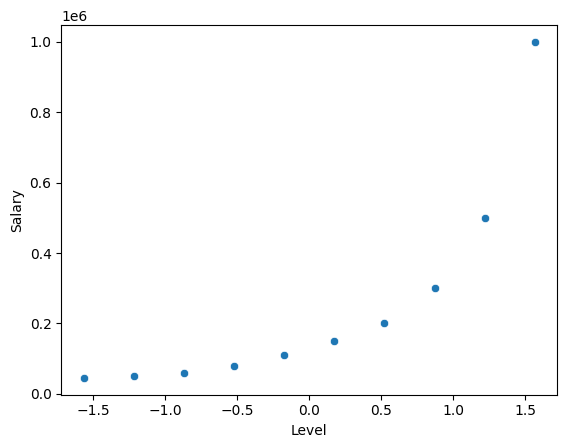

In [28]:
sns.scatterplot(x='Level',y='Salary',data=df)
plt.show()

In [29]:
X = df.drop('Salary',axis=1)
y=df['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [30]:
poly = PolynomialFeatures(degree=3)

In [31]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train_poly,y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test_poly)

In [35]:
mean_absolute_error(y_test,y_pred)

54652.781287667436

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(65203.12042836956)

In [37]:
r2_score(y_test,y_pred)

0.8901119407743591